**Importing Necessary Libraries**

In [1]:
import nltk
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import numpy as np

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

from sklearn.decomposition import TruncatedSVD
from gensim import corpora, models
from gensim.models.ldamodel import LdaModel

import matplotlib.colors as mcolors
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
from bokeh.models import HoverTool, CustomJS, ColumnDataSource, Slider
from bokeh.layouts import column
from bokeh.palettes import all_palettes

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
dataset=pd.read_csv("/content/Womens Clothing E-Commerce Reviews.csv")
data = pd.DataFrame(dataset)

In [3]:
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


**Preprocessing**

In [4]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [5]:
def preprocess_text(text):
    le=WordNetLemmatizer()
    word_tokens=word_tokenize(text.lower())
    tokens=[le.lemmatize(w) for w in word_tokens if w not in stop_words and len(w)>3]
    preprocessed_text=" ".join(tokens)
    return preprocessed_text

In [6]:
data['preprocessed_text']=data['Review Text'].apply(str).apply(preprocess_text)
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,preprocessed_text
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,absolutely wonderful silky sexy comfortable
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,love dress sooo pretty happened find store gla...
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,high hope dress really wanted work initially o...
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,love love love jumpsuit flirty fabulous every ...
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,shirt flattering adjustable front perfect leng...


In [7]:
text = data['preprocessed_text']

## **Document Term Matrix using TF-IDF Vectorisation**

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect =TfidfVectorizer(stop_words=stop_words,max_features=500)
vect_text=vect.fit_transform(data['preprocessed_text'])
print(vect.get_feature_names_out())

['10' 'able' 'absolutely' 'across' 'actually' 'add' 'addition' 'adorable'
 'agree' 'almost' 'already' 'also' 'although' 'always' 'amazing' 'amount'
 'ankle' 'another' 'anything' 'appears' 'appropriate' 'area' 'arm'
 'armhole' 'around' 'arrived' 'athletic' 'available' 'away' 'awesome'
 'baby' 'back' 'baggy' 'based' 'basic' 'beautiful' 'beautifully' 'belt'
 'best' 'better' 'bigger' 'black' 'blazer' 'blouse' 'blue' 'body' 'boot'
 'booty' 'bottom' 'bought' 'boxy' 'brand' 'bright' 'broad' 'brown' 'bulky'
 'bust' 'busty' 'button' 'buying' 'came' 'cami' 'cardigan' 'casual'
 'cheap' 'chest' 'classic' 'close' 'closet' 'clothes' 'clothing' 'coat'
 'cold' 'collar' 'color' 'come' 'comfortable' 'comfy' 'complaint'
 'completely' 'compliment' 'cool' 'cotton' 'could' 'couple' 'cover' 'cozy'
 'cream' 'cropped' 'curve' 'curvy' 'cute' 'dark' 'day' 'decided' 'deep'
 'definitely' 'delicate' 'denim' 'depending' 'design' 'detail' 'different'
 'disappointed' 'drape' 'dress' 'dressed' 'dressy' 'easily' 'easy'


**Latent Semantic Analysis**

In [9]:
lsa_model = TruncatedSVD(n_components=4, algorithm='randomized', n_iter=10, random_state=42)
lsa_top=lsa_model.fit_transform(vect_text)

In [10]:
#Topics for document 0:
for i, topic in enumerate(lsa_top[0]):
    print("Topic ", i, " : ", topic*100)

Topic  0  :  6.365879751356879
Topic  1  :  0.08827038989063637
Topic  2  :  8.819136645898919
Topic  3  :  3.85965122781884


In [11]:
print(lsa_model.components_.shape) # (no_of_topics*no_of_words)
print(lsa_model.components_)

(4, 500)
[[ 0.0172635   0.01849333  0.03433528 ...  0.02626005  0.01306709
   0.01701178]
 [ 0.00247588  0.00292028  0.01154097 ... -0.006169   -0.00585186
   0.01696588]
 [-0.01180507 -0.00614807  0.03135113 ...  0.01952736  0.00106676
  -0.00824141]
 [ 0.00896577  0.00744395  0.02296981 ...  0.01132801 -0.00648199
  -0.01114269]]


In [12]:
#Now we can get a list of the important words for each of the 4 topics as shown. 
#For simplicity here I have shown 4 words for each topic.
vocab = vect.get_feature_names_out()
topic_content = []
for v in lsa_model.components_:
    sorted_vocab = sorted(zip(vocab, v), key=lambda x : x[1], reverse=True)
    topic_content.append({x:y for x, y in sorted_vocab})
  

In [13]:
print("Top 5 words in topic 1 : ", list(topic_content[0].keys())[:5])
print("Top 5 words in topic 2 : ", list(topic_content[1].keys())[:5])
print("Top 5 words in topic 3 : ", list(topic_content[2].keys())[:5])
print("Top 5 words in topic 4 : ", list(topic_content[3].keys())[:5])

Top 5 words in topic 1 :  ['dress', 'size', 'love', 'great', 'look']
Top 5 words in topic 2 :  ['dress', 'slip', 'beautiful', 'wedding', 'knee']
Top 5 words in topic 3 :  ['love', 'great', 'comfortable', 'jean', 'dress']
Top 5 words in topic 4 :  ['size', 'small', 'love', 'true', 'perfect']


In [14]:
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

In [15]:
tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_top)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 23486 samples in 0.027s...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 23486 samples in 1.760s...
[t-SNE] Computed conditional probabilities for sample 1000 / 23486
[t-SNE] Computed conditional probabilities for sample 2000 / 23486
[t-SNE] Computed conditional probabilities for sample 3000 / 23486
[t-SNE] Computed conditional probabilities for sample 4000 / 23486
[t-SNE] Computed conditional probabilities for sample 5000 / 23486
[t-SNE] Computed conditional probabilities for sample 6000 / 23486
[t-SNE] Computed conditional probabilities for sample 7000 / 23486
[t-SNE] Computed conditional probabilities for sample 8000 / 23486
[t-SNE] Computed conditional probabilities for sample 9000 / 23486
[t-SNE] Computed conditional probabilities for sample 10000 / 23486
[t-SNE] Computed conditional probabilities for sample 11000 / 23486
[t-SNE] Computed conditional probabilities for sample 12000 / 23486
[t-SNE] Computed conditional probabilities for sample 13000 / 23486
[t-SNE] Computed conditional probabilities for sample 14000 / 23486

In [16]:
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])

In [17]:
lsa_keys=lsa_top.argmax(axis=1).tolist()

In [18]:
n_topics=4
plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=500, plot_height=500)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=mycolors[lsa_keys])
    
show(plot)

**Word clouds for LSA**

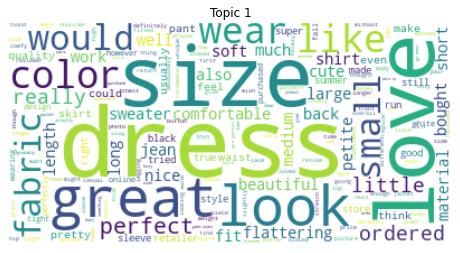

In [19]:
from wordcloud import WordCloud
cloud1= WordCloud(background_color="white", max_words=500)
cloud1.generate_from_frequencies(topic_content[0])

fig = plt.figure(1, figsize=(8, 8))
plt.imshow(cloud1, interpolation="bilinear")
plt.title("Topic 1")
plt.axis("off")
plt.show()

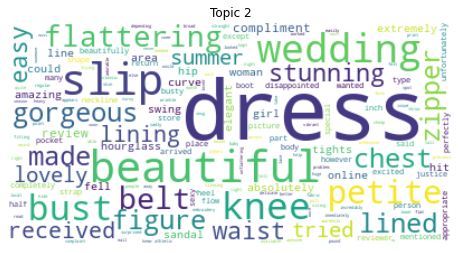

In [20]:

cloud2= WordCloud(background_color="white", max_words=500)
cloud2.generate_from_frequencies(topic_content[1])

fig = plt.figure(1, figsize=(8, 8))
plt.imshow(cloud2, interpolation="bilinear")
plt.title("Topic 2")
plt.axis("off")
plt.show()

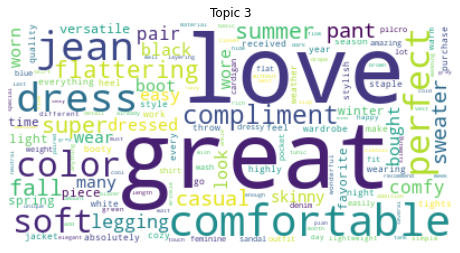

In [21]:

cloud3= WordCloud(background_color="white", max_words=500)
cloud3.generate_from_frequencies(topic_content[2])

fig = plt.figure(1, figsize=(8, 8))
plt.imshow(cloud3, interpolation="bilinear")
plt.title("Topic 3")
plt.axis("off")
plt.show()

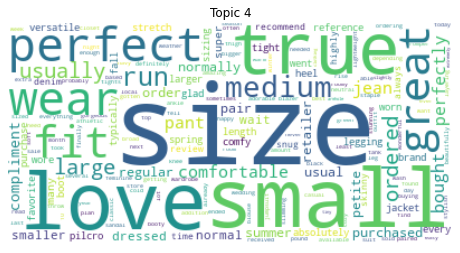

In [22]:

cloud4= WordCloud(background_color="white", max_words=500)
cloud4.generate_from_frequencies(topic_content[3])

fig = plt.figure(1, figsize=(8,8))
plt.imshow(cloud4, interpolation="bilinear")
plt.title("Topic 4")
plt.axis("off")
plt.show()

**LDA**

In [23]:
text = data['preprocessed_text'].apply(lambda x:word_tokenize(x))

In [24]:
dictionary = corpora.Dictionary(text)
corpus = [dictionary.doc2bow(i) for i in text]

In [25]:
ldamodel = models.ldamodel.LdaModel(corpus, id2word=dictionary, 
                                    num_topics=4, passes=5, minimum_probability=0)

In [26]:
ldamodel.print_topics()

[(0,
  '0.100*"dress" + 0.013*"fabric" + 0.012*"love" + 0.012*"beautiful" + 0.010*"flattering" + 0.010*"wear" + 0.009*"perfect" + 0.009*"color" + 0.008*"skirt" + 0.007*"look"'),
 (1,
  '0.039*"size" + 0.025*"small" + 0.016*"would" + 0.015*"ordered" + 0.015*"large" + 0.013*"like" + 0.011*"medium" + 0.011*"look" + 0.010*"petite" + 0.010*"waist"'),
 (2,
  '0.021*"like" + 0.019*"color" + 0.016*"look" + 0.012*"would" + 0.011*"back" + 0.010*"shirt" + 0.010*"much" + 0.009*"love" + 0.009*"fabric" + 0.009*"really"'),
 (3,
  '0.034*"love" + 0.029*"great" + 0.020*"wear" + 0.018*"color" + 0.017*"jean" + 0.016*"soft" + 0.015*"sweater" + 0.015*"perfect" + 0.015*"comfortable" + 0.013*"look"')]

In [27]:
num = np.array([[y for (x,y) in ldamodel[corpus[i]]] for i in range(len(corpus))])
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(num)

topic = np.argmax(num, axis=1)

output_notebook()
n = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
fig = figure(title="t-SNE Clustering of {} LDA Topics".format(n), 
              plot_width=500, plot_height=500)
fig.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic])
show(fig)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 23486 samples in 0.014s...
[t-SNE] Computed neighbors for 23486 samples in 0.512s...
[t-SNE] Computed conditional probabilities for sample 1000 / 23486
[t-SNE] Computed conditional probabilities for sample 2000 / 23486
[t-SNE] Computed conditional probabilities for sample 3000 / 23486
[t-SNE] Computed conditional probabilities for sample 4000 / 23486
[t-SNE] Computed conditional probabilities for sample 5000 / 23486
[t-SNE] Computed conditional probabilities for sample 6000 / 23486
[t-SNE] Computed conditional probabilities for sample 7000 / 23486
[t-SNE] Computed conditional probabilities for sample 8000 / 23486
[t-SNE] Computed conditional probabilities for sample 9000 / 23486
[t-SNE] Computed conditional probabilities for sample 10000 / 23486
[t-SNE] Computed conditional probabilities for sample 11000 / 23486
[t-SNE] Computed conditional probabilities for sample 12000 / 23486
[t-SNE] Computed conditional probabilities for sam

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.873810
[t-SNE] KL divergence after 1000 iterations: 1.162829


In [28]:
pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 22.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=5b0074466904e3f29ca5cd5547c2abcfa7f3e89f87fd0fae6f8dbe74b5609ef7
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=1da697af7775766f007e024955d885e4b4238fc2d0feae27e7370366e36a33ff
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built pyLDAvis sklearn


In [29]:
import pyLDAvis
import pyLDAvis.gensim_models
print(ldamodel.print_topics(num_topics=4, num_words=3))

[(0, '0.100*"dress" + 0.013*"fabric" + 0.012*"love"'), (1, '0.039*"size" + 0.025*"small" + 0.016*"would"'), (2, '0.021*"like" + 0.019*"color" + 0.016*"look"'), (3, '0.034*"love" + 0.029*"great" + 0.020*"wear"')]


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [30]:
!pip install pandas==1.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.5 MB 10.7 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


In [31]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = pyLDAvis.gensim_models.prepare(ldamodel,corpus, dictionary)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [32]:
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.156805  0.005296       1        1  31.215098
3     -0.157613 -0.078726       2        1  25.518496
2      0.058717 -0.077054       3        1  24.175587
0     -0.057909  0.150484       4        1  19.090819, topic_info=         Term          Freq         Total Category  logprob  loglift
7       dress  10943.000000  10943.000000  Default  30.0000  30.0000
51      small   4540.000000   4540.000000  Default  29.0000  29.0000
50       size   9175.000000   9175.000000  Default  28.0000  28.0000
296      jean   2525.000000   2525.000000  Default  27.0000  27.0000
62      great   5891.000000   5891.000000  Default  26.0000  26.0000
..        ...           ...           ...      ...      ...      ...
180  material    466.257276   2767.944609   Topic4  -5.4478  -0.1252
246     waist    448.543719   2285.114344   Topic4  -5.4865   0.0278
27      would    466.409304   5271.168639   Topic4  -5.4475  -0.7690
172      back    428.474056   3053.773937   Topic4  -5.5323  -0.3079
62      great    433.019063   5891.581161   Topic4  -5.5217  -0.9545

[337 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1610      1  0.989116   10/12
2057      1  0.981174  125lbs
1568      1  0.991332    32dd
4076      1  0.985039    34dd
1803      4  0.986779  adding
...     ...       ...     ...
1825      3  0.984974    xs/s
1532      1  0.988767  zipped
57        1  0.402766  zipper
57        2  0.018922  zipper
57        4  0.578470  zipper

[636 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 1])